In [6]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from pathlib import Path
from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
gpd.read_file?

In [16]:
# Read shapefile
ph = gpd.read_file('gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(60)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

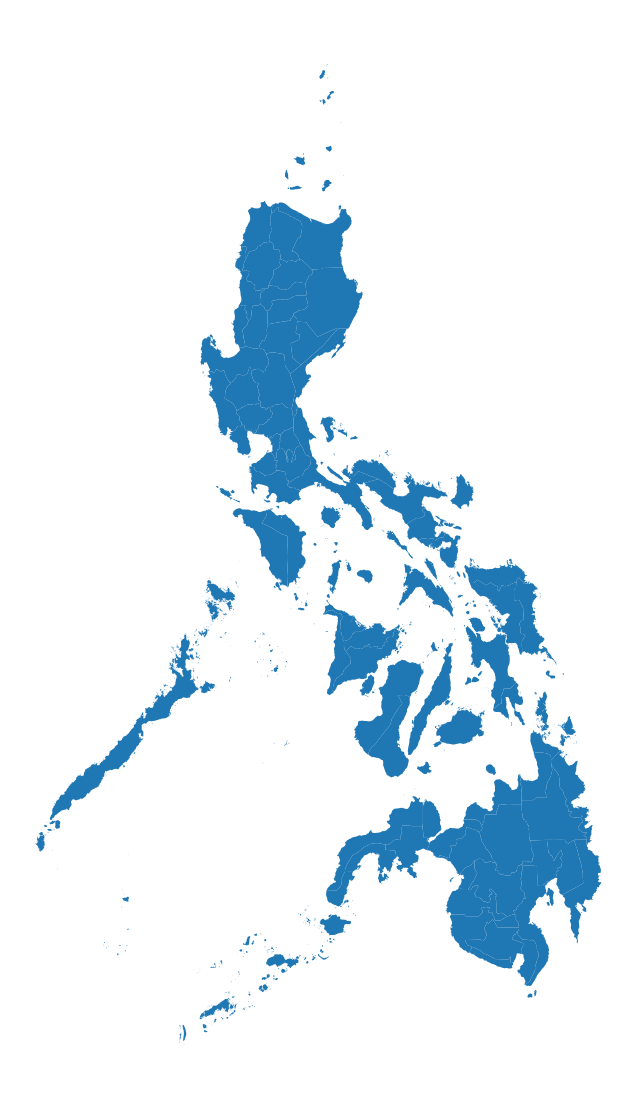

In [10]:
ax = ph.plot(figsize=(30,20))

ax.axis('off')

In [11]:
# Read GeoJSON file
healthsites = gpd.read_file('philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [14]:
healthsites_near = gpd.sjoin(healthsites,ph, op='within')
healthsites_near.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
200,4196852283,node,6.0,,clinic,,,,,39446699.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
225,4900961821,node,9.0,,clinic,,,,,49324674.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
402,4728751605,node,9.0,,pharmacy,,,,,46755569.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
405,4812503217,node,9.0,,clinic,,,,,55569745.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II


<AxesSubplot:>

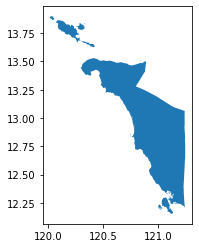

In [17]:
occidentalmindoro = ph[ph.NAME_1=="Occidental Mindoro"]
occidentalmindoro.plot()

In [18]:
minclinic = healthsites[healthsites.amenity=='clinic']
mindentist = healthsites[healthsites.amenity=='dentist']
mindoctors = healthsites[healthsites.amenity=='doctors']
minhealthcare = healthsites[healthsites.amenity=='healthcare']
minhospital = healthsites[healthsites.amenity=='hospital']
minlab = healthsites[healthsites.amenity=='laboratory']
minpharm = healthsites[healthsites.amenity=='pharmacy']
minsoc_fac = healthsites[healthsites.amenity=='social_facility']

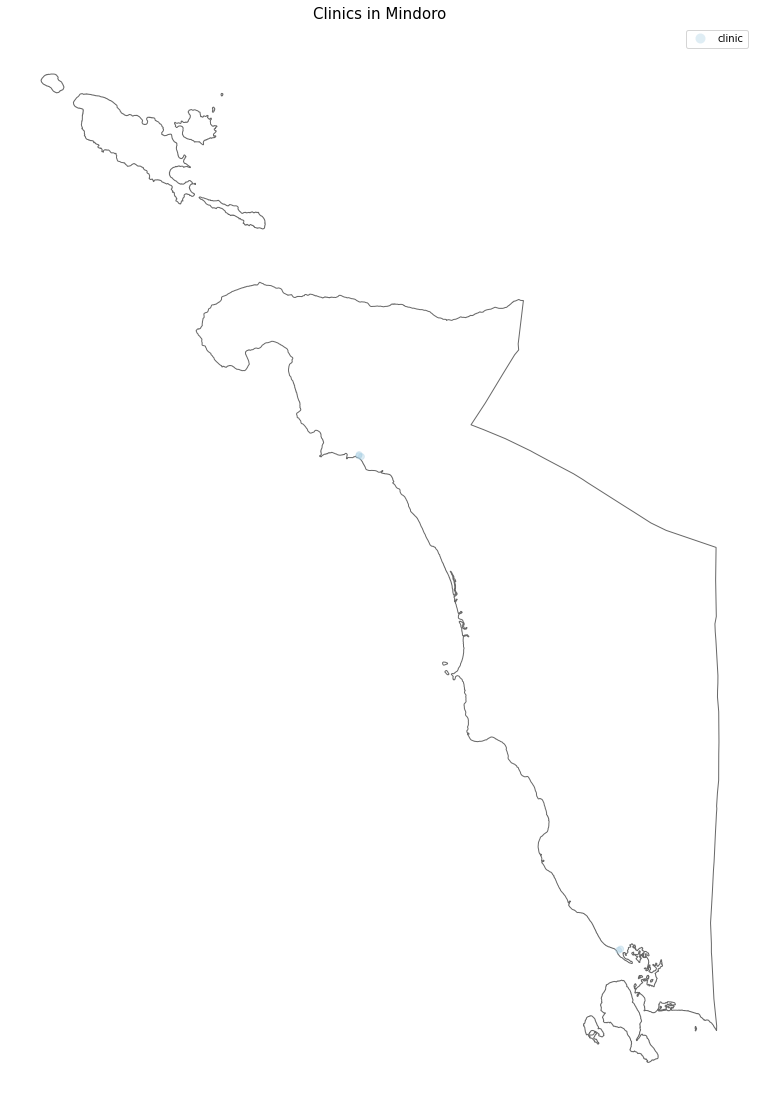

In [20]:
clinicmin = gpd.sjoin(minclinic,occidentalmindoro, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

occidentalmindoro.plot(ax=ax, color='white', edgecolor='dimgray')
clinicmin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Clinics in Mindoro', fontsize=15)
ax.axis('off');

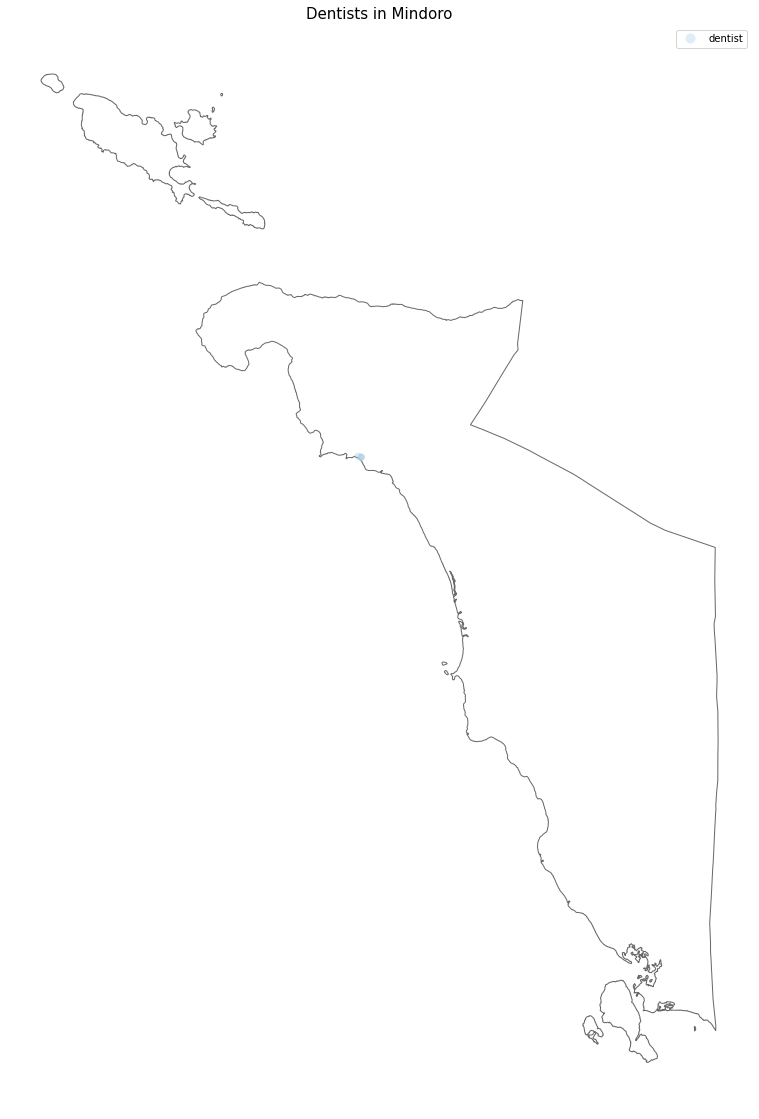

In [22]:
dentistmin = gpd.sjoin(mindentist,occidentalmindoro, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

occidentalmindoro.plot(ax=ax, color='white', edgecolor='dimgray')
dentistmin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Dentists in Mindoro', fontsize=15)
ax.axis('off');

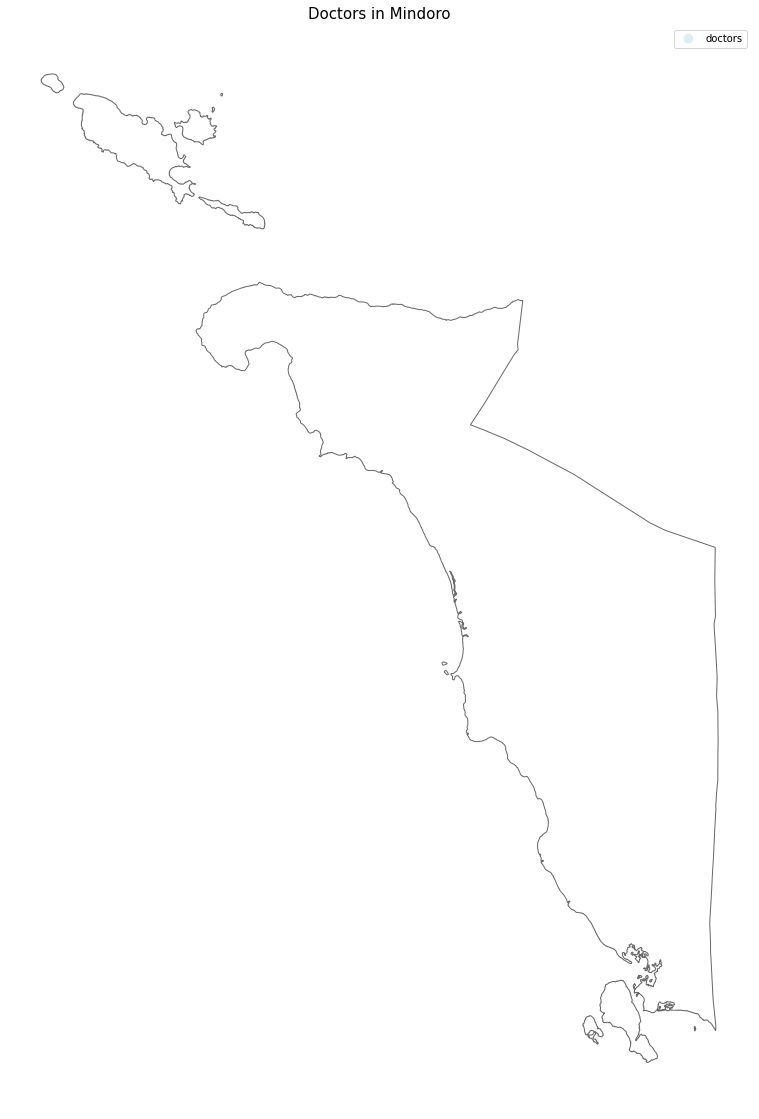

In [25]:
doctorsmin = gpd.sjoin(mindoctors,occidentalmindoro, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

occidentalmindoro.plot(ax=ax, color='white', edgecolor='dimgray')
doctorsmin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Doctors in Mindoro', fontsize=15)
ax.axis('off');

In [24]:
healthcaremin = gpd.sjoin(minhealthcare,occidentalmindoro, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

occidentalmindoro.plot(ax=ax, color='white', edgecolor='dimgray')
healthcaremin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Healthcares in Mindoro', fontsize=15)
ax.axis('off');

#Province does not have healthcare

C:\Users\josep\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values


ValueError: cannot convert float NaN to integer

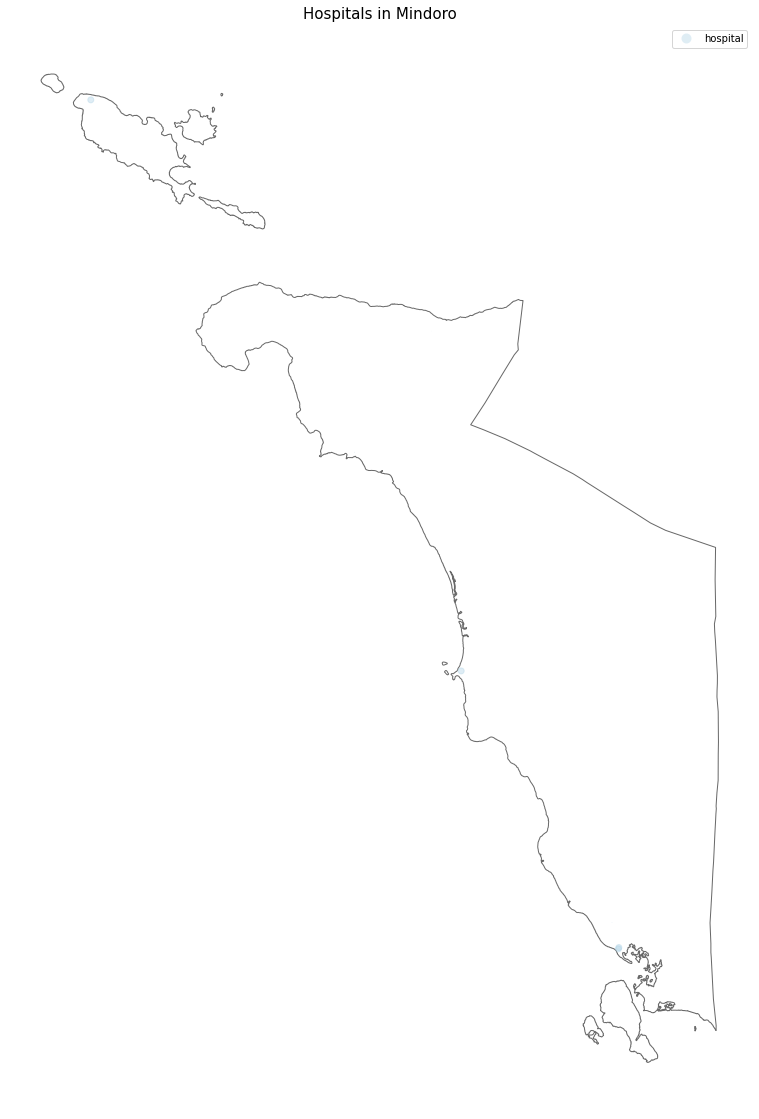

In [26]:
hospitalmin = gpd.sjoin(minhospital,occidentalmindoro, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

occidentalmindoro.plot(ax=ax, color='white', edgecolor='dimgray')
hospitalmin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Hospitals in Mindoro', fontsize=15)
ax.axis('off');

In [27]:
labmin = gpd.sjoin(minlab,occidentalmindoro, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

occidentalmindoro.plot(ax=ax, color='white', edgecolor='dimgray')
labmin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Laboratories in Mindoro', fontsize=15)
ax.axis('off');

#Province does not have a laboratory

C:\Users\josep\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values


ValueError: cannot convert float NaN to integer

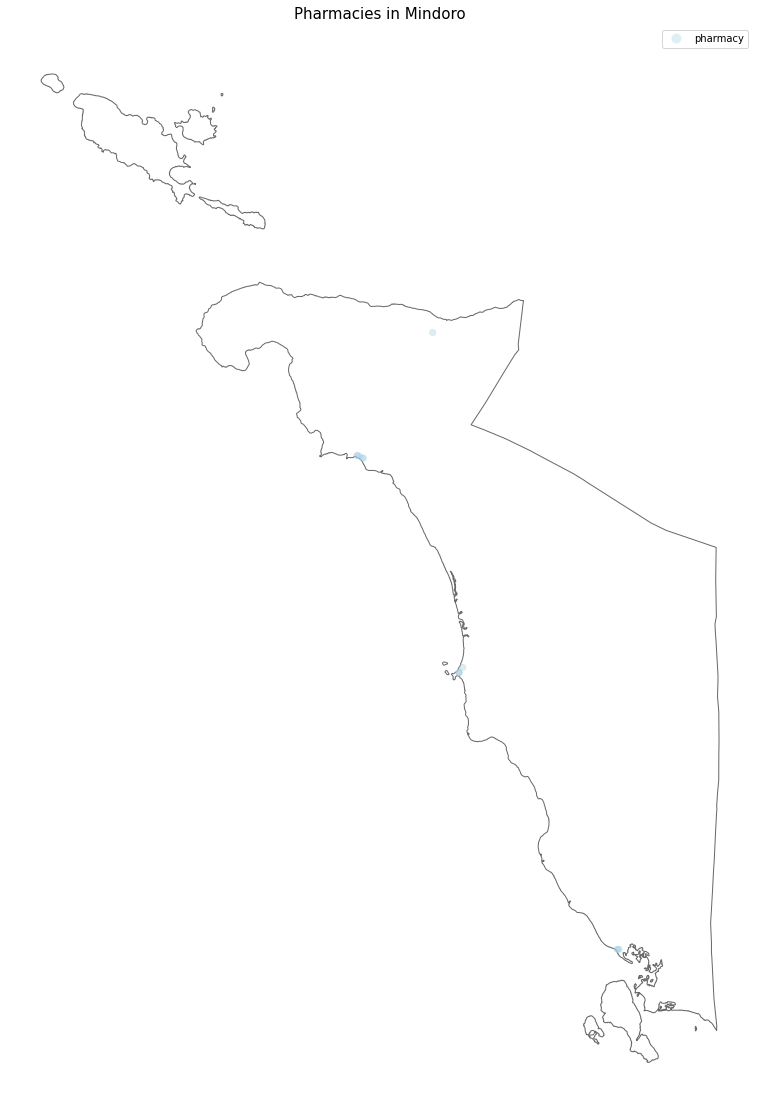

In [29]:
pharmmin = gpd.sjoin(minpharm,occidentalmindoro, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

occidentalmindoro.plot(ax=ax, color='white', edgecolor='dimgray')
pharmmin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Mindoro', fontsize=15)
ax.axis('off');

In [30]:
soc_facmin = gpd.sjoin(minsoc_fac,occidentalmindoro, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

occidentalmindoro.plot(ax=ax, color='white', edgecolor='dimgray')
soc_facmin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Social Facilities in Mindoro', fontsize=15)
ax.axis('off');

#Province does not have Social Facility

C:\Users\josep\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values


ValueError: cannot convert float NaN to integer

<AxesSubplot:>

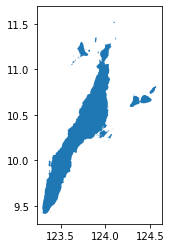

In [32]:
cebu = ph[ph.NAME_1=="Cebu"]
cebu.plot()

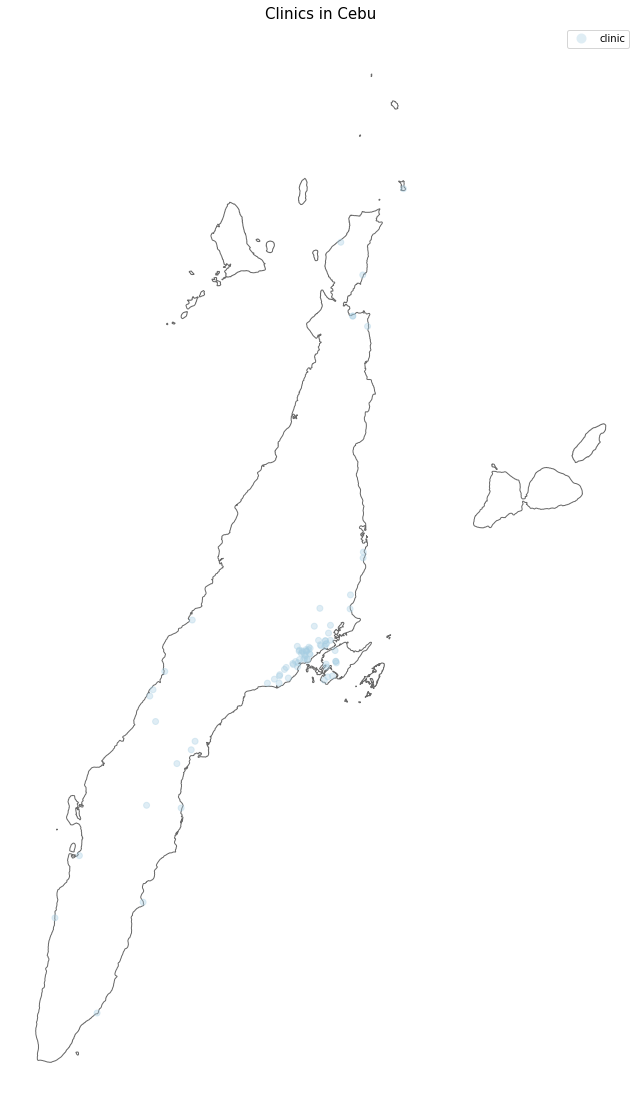

In [35]:
cliniccebu = gpd.sjoin(minclinic,cebu, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

cebu.plot(ax=ax, color='white', edgecolor='dimgray')
cliniccebu.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Clinics in Cebu', fontsize=15)
ax.axis('off');

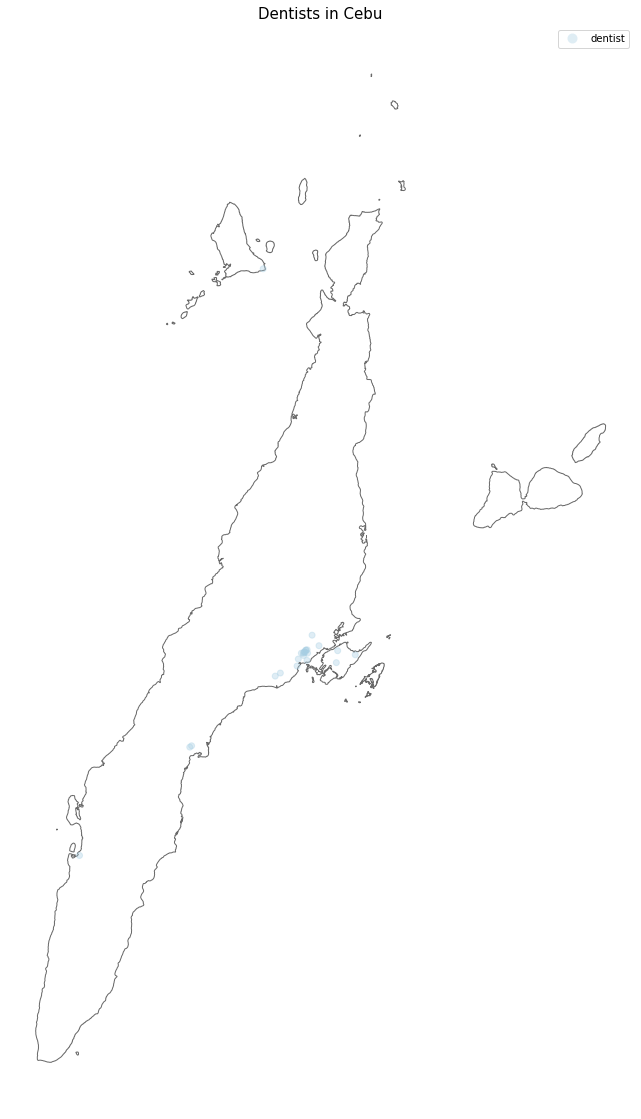

In [37]:
dentistcebu = gpd.sjoin(mindentist,cebu, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

cebu.plot(ax=ax, color='white', edgecolor='dimgray')
dentistcebu.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Dentists in Cebu', fontsize=15)
ax.axis('off');

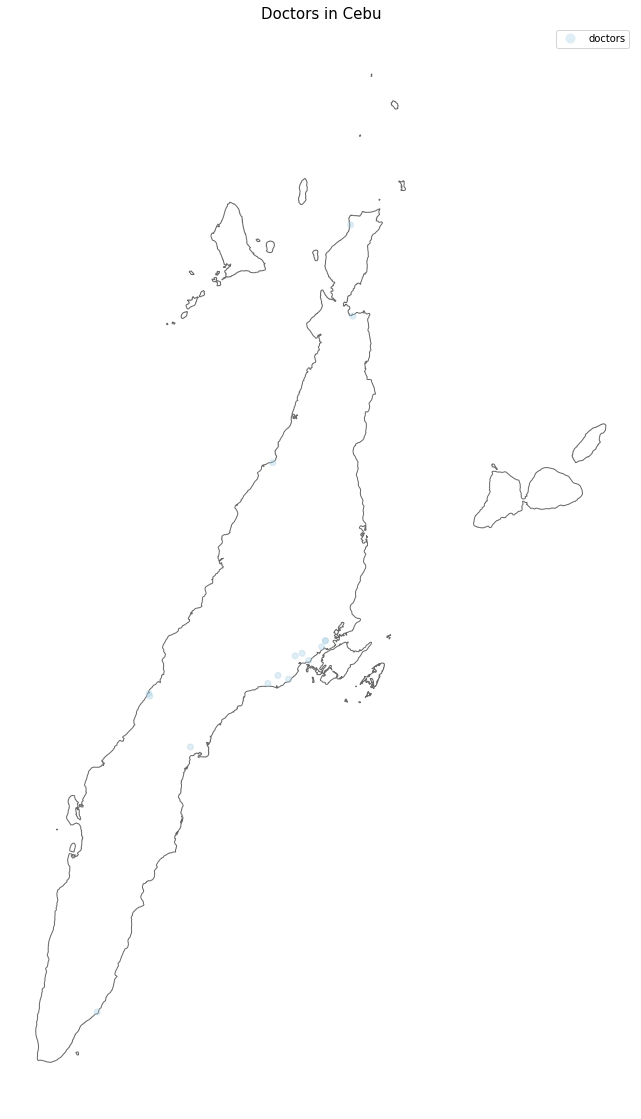

In [38]:
doctorscebu = gpd.sjoin(mindoctors,cebu, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

cebu.plot(ax=ax, color='white', edgecolor='dimgray')
doctorscebu.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Doctors in Cebu', fontsize=15)
ax.axis('off');

In [39]:
healthcarecebu = gpd.sjoin(minhealthcare,cebu, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

cebu.plot(ax=ax, color='white', edgecolor='dimgray')
healthcarecebu.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Healthcares in Cebu', fontsize=15)
ax.axis('off');

#The city does not have healthcare

C:\Users\josep\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values


ValueError: cannot convert float NaN to integer

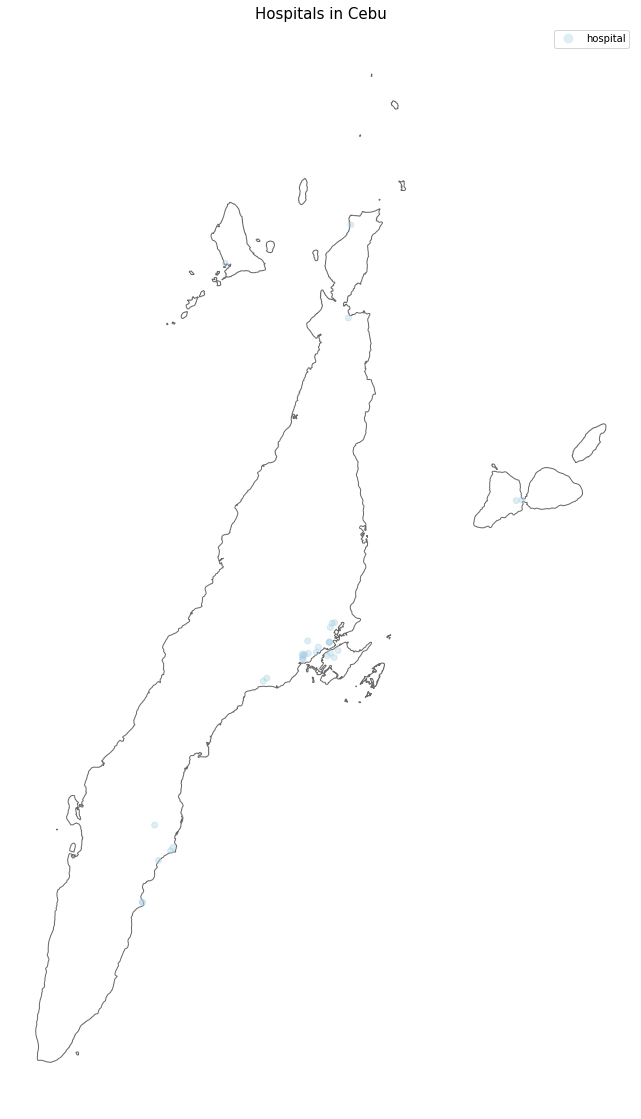

In [41]:
hospitalcebu = gpd.sjoin(minhospital,cebu, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

cebu.plot(ax=ax, color='white', edgecolor='dimgray')
hospitalcebu.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Hospitals in Cebu', fontsize=15)
ax.axis('off');

In [42]:
labcebu = gpd.sjoin(minlab,cebu, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

cebu.plot(ax=ax, color='white', edgecolor='dimgray')
labcebu.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Laboratories in Cebu', fontsize=15)
ax.axis('off');

#City does not have laboratories

C:\Users\josep\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values


ValueError: cannot convert float NaN to integer

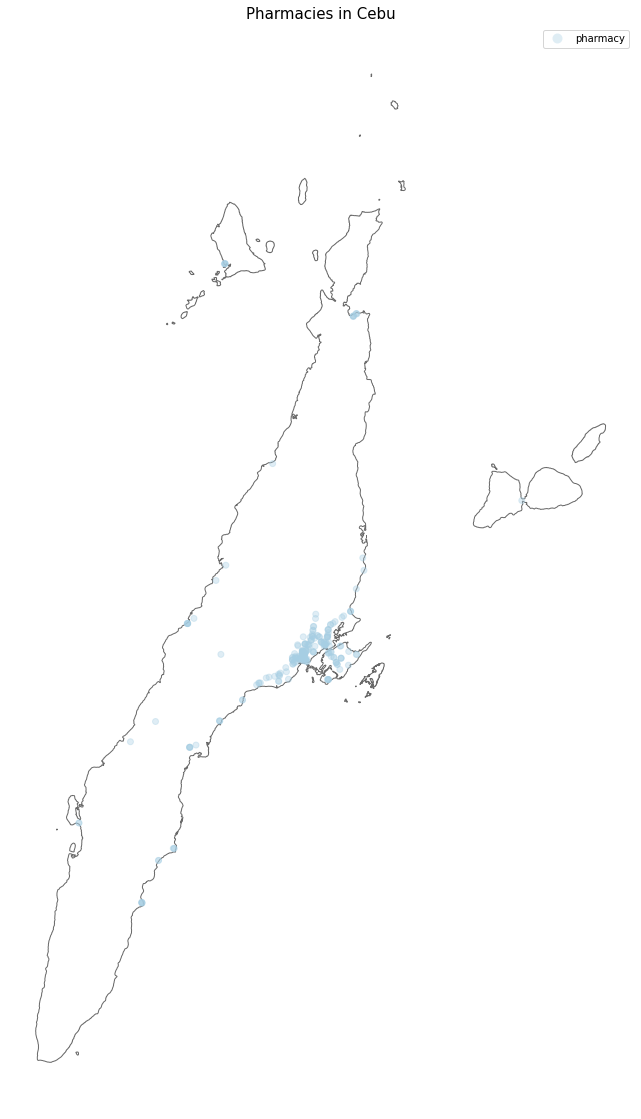

In [43]:
pharmcebu = gpd.sjoin(minpharm,cebu, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

cebu.plot(ax=ax, color='white', edgecolor='dimgray')
pharmcebu.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Cebu', fontsize=15)
ax.axis('off');

In [44]:
soc_faccebu = gpd.sjoin(minsoc_fac,cebu, op='within')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

cebu.plot(ax=ax, color='white', edgecolor='dimgray')
soc_faccebu.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Social Facilities in Cebu', fontsize=15)
ax.axis('off');

#City does not have Social Facilities

C:\Users\josep\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values


ValueError: cannot convert float NaN to integer